<a href="https://colab.research.google.com/github/Andyzxm/GEOG_520_open_source_method/blob/main/A11_Xinming_Zhang.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Question 1 . Explain the difference between a linear correlation and a monotonic
correlation.
A:
Linear correlation is one of the basic correlation relationships, and a linear relationship is a trend in the data that can be modeled by a straight line. Monotonic correlation is similar in terms of the variables that tend to move in the same relative direction, but not necessarily at a constant rate. Therefore the visual representation of monotonic correlation is not linear. 


Question 2. Explain the difference between the Pearson and Spearman correlation
coefficients?
A:
Pearson correlation is the measure of linear correlation between two variables. It is strictly for linear correlation and normally represented as a normal distribution. Spearman correlation is the measure of monotonic correlation based on ranks. It does not look at the values but the ranks of the values. Assumes It represents a tread that goes in one direction. 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats as st
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [ ]:

# Task 1
coal= pd.read_csv("/content/drive/MyDrive/GEOG520_python_data/datasets/datasets/coal_qual.csv")

coal.columns = [column.replace(" ", "_") for column in coal.columns]
coal = coal.set_index('Sample_ID')
coal = coal.T
coal.columns = coal.columns.str.strip()
coal.head(10)

Sample_ID,Ash,Si,Al,Ca,Mg,Na,K,Fe,Ti,TS,...,Ta,Tb,Th,U,V,W,Y,Yb,Zn,Zr
WA3189255,6.70,14700.0,8930.0,1540.0,353.0,685.0,790.0,1050.0,588.0,2.120,...,0.166,0.1830,2.13,1.140,16.00,0.011,7.79,0.516,8.40,26.20
WA2191115,6.70,20500.0,8710.0,677.0,155.0,465.0,143.0,851.0,573.0,0.775,...,0.804,0.4140,5.31,0.790,11.90,0.392,7.09,1.180,6.71,26.20
W194977,6.71,8720.0,6750.0,3880.0,329.0,295.0,782.0,9860.0,373.0,2.930,...,0.220,0.3100,1.53,0.844,5.37,0.509,2.28,0.305,10.70,4.83
W203821,6.74,13800.0,10200.0,1180.0,270.0,108.0,1090.0,5770.0,546.0,1.660,...,0.145,0.2700,2.07,1.160,25.60,0.830,8.76,0.830,13.50,12.10
W210336,6.75,14000.0,13300.0,1190.0,324.0,87.7,958.0,2410.0,445.0,0.927,...,0.191,0.7860,2.52,0.473,22.90,0.806,9.45,1.410,25.60,12.80
W193132,6.77,12500.0,7770.0,967.0,251.0,474.0,845.0,9520.0,486.0,1.040,...,0.104,0.1880,1.15,0.521,7.45,0.396,1.90,0.313,12.20,6.64
W193982,6.83,17000.0,8970.0,1510.0,301.0,444.0,182.0,2250.0,817.0,0.925,...,0.256,0.2610,3.37,1.730,8.20,0.673,5.60,0.754,2.26,15.00
W193973,6.86,16400.0,7140.0,3330.0,521.0,363.0,394.0,3450.0,902.0,1.010,...,0.181,0.2620,2.12,1.380,10.30,0.544,6.31,0.605,4.25,28.80
W206552,6.88,8940.0,7150.0,3470.0,426.0,509.0,639.0,14500.0,351.0,3.330,...,0.115,0.0938,1.04,0.250,5.98,0.730,1.58,0.313,14.40,7.56
W199001,6.88,15700.0,12500.0,481.0,227.0,557.0,726.0,2840.0,399.0,0.588,...,0.230,0.3700,2.50,2.060,33.70,0.313,8.25,0.990,6.88,8.25


In [ ]:
# Task 2. Extract out just the measurements associated with Ash (“Ash”), Silicon (“Si”),
#Aluminum (“Al”), Calcium (“Ca”), Magnesium (“Mg”), Sodium (“Na”), Potassium
#(“K”), Mercury (“Hg”), Phosphorous (“P”), and Lead (“Pb”)
measurement=coal[["Ash", "Si","Al","Ca","Mg","Na", "K","Hg","P","Pb"]]
measurement

Sample_ID,Ash,Si,Al,Ca,Mg,Na,K,Hg,P,Pb
WA3189255,6.70,14700.0,8930.0,1540.0,353.0,685.0,790.0,0.0295,300.0,4.30
WA2191115,6.70,20500.0,8710.0,677.0,155.0,465.0,143.0,0.0553,590.0,4.26
W194977,6.71,8720.0,6750.0,3880.0,329.0,295.0,782.0,0.3050,381.0,3.09
W203821,6.74,13800.0,10200.0,1180.0,270.0,108.0,1090.0,0.1240,39.1,4.38
W210336,6.75,14000.0,13300.0,1190.0,324.0,87.7,958.0,0.0554,368.0,5.26
...,...,...,...,...,...,...,...,...,...,...
W203826,30.70,66400.0,51000.0,983.0,1260.0,369.0,5650.0,0.0856,181.0,19.40
W201530,31.60,75600.0,63600.0,564.0,979.0,442.0,5310.0,0.0835,96.6,24.30
W190922,33.30,85500.0,60000.0,476.0,2100.0,2130.0,9980.0,0.1150,437.0,16.70
W203829,34.00,84100.0,52100.0,1160.0,1940.0,715.0,14400.0,0.1820,201.0,40.90


In [ ]:
#Task 3. Calculate all Pearson correlation coefficients for all pairs of chemical measurements. Present the results in a table.
# Pearson correlation
coal.corr(method = "pearson")


Sample_ID,Ash,Si,Al,Ca,Mg,Na,K,Fe,Ti,TS,...,Ta,Tb,Th,U,V,W,Y,Yb,Zn,Zr
Sample_ID,,,,,,,,,,,,,,,,,,,,,
Ash,1.000000,0.951054,0.932405,0.070141,0.770178,0.352503,0.836136,0.254900,0.748450,-0.233794,...,0.456834,0.371188,0.698874,0.480486,0.772710,0.202411,0.550708,0.545273,0.257469,0.511340
Si,0.951054,1.000000,0.917566,-0.079293,0.728201,0.375210,0.816347,0.002391,0.828043,-0.378078,...,0.511579,0.327959,0.759313,0.473012,0.757865,0.202785,0.546980,0.547004,0.196366,0.567772
Al,0.932405,0.917566,1.000000,-0.039398,0.705177,0.381393,0.767371,0.019253,0.772071,-0.294378,...,0.470497,0.406147,0.742957,0.440299,0.834406,0.199584,0.596409,0.578207,0.177588,0.517533
Ca,0.070141,-0.079293,-0.039398,1.000000,0.172957,-0.011713,-0.048741,0.249057,-0.114992,0.736214,...,-0.087342,0.034063,-0.159896,-0.137521,-0.082863,0.005478,0.007030,-0.073762,0.080862,0.015792
Mg,0.770178,0.728201,0.705177,0.172957,1.000000,0.475570,0.841968,0.120512,0.433289,0.033054,...,0.230036,0.302122,0.472665,0.431260,0.615473,0.124806,0.443729,0.417370,0.226636,0.319118
Na,0.352503,0.375210,0.381393,-0.011713,0.475570,1.000000,0.335447,-0.034660,0.253250,-0.060811,...,0.001839,-0.012933,0.160265,0.110403,0.308274,0.038152,0.215045,0.086829,-0.040011,0.193363
K,0.836136,0.816347,0.767371,-0.048741,0.841968,0.335447,1.000000,0.125268,0.497097,-0.237265,...,0.304780,0.332848,0.614803,0.543042,0.731429,0.183390,0.460020,0.527533,0.179654,0.349674
Fe,0.254900,0.002391,0.019253,0.249057,0.120512,-0.034660,0.125268,1.000000,-0.132302,0.216018,...,-0.101202,0.025965,-0.139721,0.077539,0.008556,0.034653,-0.039068,-0.035225,0.240069,-0.097675
Ti,0.748450,0.828043,0.772071,-0.114992,0.433289,0.253250,0.497097,-0.132302,1.000000,-0.392358,...,0.660585,0.207908,0.731161,0.301665,0.544378,0.197156,0.407531,0.409404,0.087244,0.618120


In [ ]:
# Task 4 Spearman correlation
coal.corr(method = "spearman")

Sample_ID,Ash,Si,Al,Ca,Mg,Na,K,Fe,Ti,TS,...,Ta,Tb,Th,U,V,W,Y,Yb,Zn,Zr
Sample_ID,,,,,,,,,,,,,,,,,,,,,
Ash,1.000000,0.886474,0.846692,0.062567,0.640644,0.253293,0.718107,0.252858,0.731986,-0.357138,...,0.495482,0.374507,0.589081,0.435194,0.647087,0.281304,0.481565,0.524824,0.444245,0.507505
Si,0.886474,1.000000,0.875638,-0.161490,0.576230,0.303557,0.703284,-0.090298,0.876751,-0.545190,...,0.579477,0.337250,0.728825,0.457581,0.689532,0.319645,0.514308,0.574274,0.243320,0.599560
Al,0.846692,0.875638,1.000000,-0.116949,0.564963,0.254883,0.701953,-0.102273,0.759397,-0.463679,...,0.534640,0.475233,0.736335,0.469081,0.820277,0.360674,0.612457,0.664869,0.330733,0.530922
Ca,0.062567,-0.161490,-0.116949,1.000000,0.180669,-0.053531,-0.082952,0.335831,-0.178816,0.666327,...,-0.119731,-0.068396,-0.251154,-0.206957,-0.144786,0.000914,-0.030643,-0.165890,0.232663,-0.031492
Mg,0.640644,0.576230,0.564963,0.180669,1.000000,0.395056,0.747398,0.185422,0.359231,-0.020212,...,0.186305,0.210137,0.280466,0.291336,0.466308,0.188876,0.333291,0.286509,0.510264,0.293361
Na,0.253293,0.303557,0.254883,-0.053531,0.395056,1.000000,0.236129,-0.026650,0.241035,-0.033172,...,0.023206,-0.045892,0.128758,0.088844,0.225728,0.080161,0.147199,0.002138,0.036922,0.156554
K,0.718107,0.703284,0.701953,-0.082952,0.747398,0.236129,1.000000,0.147036,0.474767,-0.328320,...,0.275442,0.246637,0.449797,0.438307,0.642326,0.230915,0.364868,0.448288,0.470448,0.285261
Fe,0.252858,-0.090298,-0.102273,0.335831,0.185422,-0.026650,0.147036,1.000000,-0.178667,0.311441,...,-0.162877,-0.055257,-0.260952,0.027513,-0.094814,-0.072649,-0.171579,-0.149159,0.408793,-0.167513
Ti,0.731986,0.876751,0.759397,-0.178816,0.359231,0.241035,0.474767,-0.178667,1.000000,-0.530752,...,0.672429,0.284101,0.767114,0.364800,0.567545,0.356367,0.440182,0.496499,0.029275,0.652352


Text(0, 0.5, 'Ash Measurements')

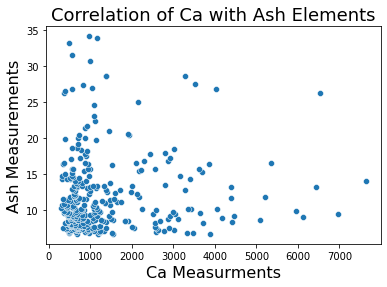

In [ ]:
#Task 5 Create three scatterplots to compare two of the measurements. 
#For each of the scatterplots, write a short paragraph describing the relationship between the variables.
# (Plot 01)

# Scatterplot1 of Al and Si

fig, axs = plt.subplots(1,1)
sp1 = sns.scatterplot(ax=axs, x="Ca", y="Ash", data=coal)
axs.set_title("Correlation of Ca with Ash Elements", fontsize=18, color="#000000")
axs.set_xlabel("Ca Measurments", fontsize= 16, color="#000000")
axs.set_ylabel("Ash Measurements", fontsize=16, color="#000000")


In [ ]:
# Pearson and Spearman correlations
print(st.pearsonr(coal["Ca"], coal["Ash"]))
print(st.spearmanr(coal["Ca"], coal["Ash"]))

(0.07014113211302972, 0.2086622807360778)
SpearmanrResult(correlation=0.06256663830698879, pvalue=0.26220291627985876)


This scatterplot of calcium and Ash displays a non-linear and essentially to no relationship at all. The concentration of both elements are strongly presented between 2000 and 15 which indicated that most of the CA will have a Ash concentration range from 10 to 20. However, this graphy display a monotonic relationship and the correlation from the tests are really clost to 0, which means there are little to no relationships and correlations between CA and ASH.

Text(0, 0.5, 'Si Measurements')

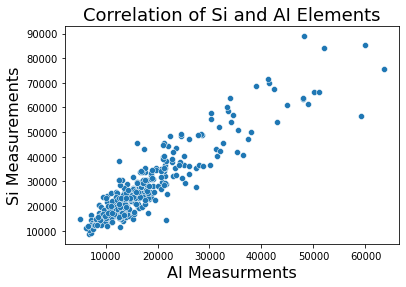

In [ ]:
# Scatterplot2 of Al and Si
fig1, axs = plt.subplots(1,1)
sp1 = sns.scatterplot(ax=axs, x="Al", y="Si", data=coal)
axs.set_title("Correlation of Si and AI Elements", fontsize=18, color="#000000")
axs.set_xlabel("AI Measurments", fontsize= 16, color="#000000")
axs.set_ylabel("Si Measurements", fontsize=16, color="#000000")


In [ ]:
print(st.pearsonr(coal["Al"], coal["Si"]))
print(st.spearmanr(coal["Al"], coal["Si"]))

(0.9175664186337786, 1.2636314792003294e-130)
SpearmanrResult(correlation=0.8756383902805229, pvalue=1.750676266229971e-103)


The spearman result is really close to 1, which means that there's a strong positive correlation between Aluminum and Silicon. The graphy display also indicated that Al increases when Si also increases. Another note is that most of the concentrations are located within the range fo 40000. After the 40000 mark, the correlation is less linear and concentrated. 

Text(0, 0.5, 'Al Measurements')

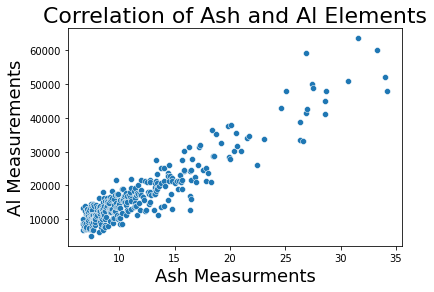

In [ ]:
#Scatterplot 3 of Ash and Aluminum 
fig3, axs = plt.subplots(1,1)
sp3 = sns.scatterplot(ax=axs, x="Ash", y="Al", data=coal)
axs.set_title("Correlation of Ash and Al Elements", fontsize=22, color="#000000")
axs.set_xlabel("Ash Measurments", fontsize= 18, color="#000000")
axs.set_ylabel("Al Measurements", fontsize=18, color="#000000")

In [ ]:
print(st.pearsonr(coal["Ash"], coal["Al"]))
print(st.spearmanr(coal["Ash"], coal["Al"]))

(0.9324045524129301, 6.295509677918425e-144)
SpearmanrResult(correlation=0.8466917903268665, pvalue=5.749728801159449e-90)


The graphy of Ash and Aluminum indicates a positive relationship between these two elements. The spearman coeffecient tests results is 0.84, which is really close to 1. This result suggested that it has a  a positive monotonic relationship. The pearson test result is 0.93, which shows a positive linear correlation. Both of the tests and the graphy suggested that Ash elements increases while Aluminum also increases.  